In [1]:
suppressMessages(library(miloR))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
suppressMessages(library(dplyr))
suppressMessages(library(patchwork))
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr::slice()      masks IRanges::slice()


In [2]:
source("milo.R")
source("../00_preprocessing/preprocessing.R")

Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




In [3]:
milo_obj = qs::qread('_targets/objects/milo_Astrocytes')
da_results = qs::qread('_targets/objects/da_results_01_Astrocytes___obob5v5')

In [4]:
exp_ngo_all = qs::qread('../genebasisr/_targets/objects/exp_ngo_all')
exp_ngo_all

An object of class Seurat 
38054 features across 144643 samples within 2 assays 
Active assay: SCT (18696 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [5]:
exp_ngo_all@meta.data %>%
filter(time == 'Day14') %>%
filter(labels == 'MOL')

,orig.ident,nCount_RNA,nFeature_RNA,Index.10x,nCount_HTO,nFeature_HTO,Index.HTO,nCount_spliced,nFeature_spliced,nCount_unspliced,⋯,strain,treatment,time,collection_date,isolation_date,batch,predicted.id,prediction.score.max,labels,polar_label
,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
ATTACTCTCCGCGGAT_1_1_2,SI-TT-A11,22867,4243,SI-TT-A11,1808,12,D706,4541,1836,18326,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch 1,MOL,1.0000000,MOL,MOL.none
CACGGGTGTTACACTG_1_1_2,SI-TT-A11,20683,4692,SI-TT-A11,1932,12,D706,3659,1875,17024,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch 1,MOL,0.9872625,MOL,MOL.none
CGAAGGAAGCACGATG_1_1_2,SI-TT-A11,13777,3094,SI-TT-A11,1326,12,D706,2838,1186,10939,⋯,obob,Veh_PF,Day14,220407,22/6/2022,Batch 1,MOL,1.0000000,MOL,MOL.none
AGCCACGGTATCCCAA_1_1_2,SI-TT-A11,10304,2706,SI-TT-A11,979,12,D706,1867,961,8437,⋯,BL6,Veh_PF,Day14,220407,22/6/2022,Batch 1,MOL,1.0000000,MOL,MOL.none
TTTGGTTGTGCAGTGA_1_1_2,SI-TT-A11,10705,3064,SI-TT-A11,1531,12,D706,2199,1170,8506,⋯,obob,Veh_PF,Day14,220407,22/6/2022,Batch 1,MOL,1.0000000,MOL,MOL.none
CCGGGTAGTTACCCAA_1_1_2,SI-TT-A11,10702,3024,SI-TT-A11,1015,12,D706,2045,1143,8657,⋯,obob,Veh_PF,Day14,220201,22/6/2022,Batch 1,MOL,0.9466731,MOL,MOL.neg
CATAGACTCCACTGAA_1_1_2,SI-TT-A11,9261,2743,SI-TT-A11,1539,12,D706,1924,1119,7337,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch 1,MOL,1.0000000,MOL,MOL.none
ACTTCGCGTGTTTACG_1_1_2,SI-TT-A11,7968,2484,SI-TT-A11,1453,12,D706,1593,940,6375,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch 1,MOL,1.0000000,MOL,MOL.none
TGCTGAATCAGTGTTG_1_1_2,SI-TT-A11,7686,2460,SI-TT-A11,1470,12,D706,1502,928,6184,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch 1,MOL,0.9971834,MOL,MOL.none


In [7]:
combined_da_results_obobBL6d5 = qs::qread('_targets/objects/combined_da_results_all.obobBL6d5')

In [8]:
combined_da_results_obobBL6d5 %>%
filter(SpatialFDR < 0.1) %>%
dim

combined_da_results_obob5v5 %>% dim

[1] 1634   11

ERROR: Error in combined_da_results_obob5v5 %>% dim: object 'combined_da_results_obob5v5' not found


In [9]:
combined_da_results_obob5v5 = qs::qread('_targets/objects/combined_da_results_all.obob5v5')

In [10]:
combined_da_results_obob5v5 %>% head

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,polarity,labels,labels_fraction,n_cells
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,5.175528,12.75419,65.87486,2.712965e-11,6.592504e-09,63,6.856218e-09,pos,a1_Tany__Astrocytes,1,129
2,4.883802,12.97953,50.94093,1.324004e-09,1.608665e-07,93,1.592806e-07,pos,a1_Tany__Astrocytes,1,166
3,3.576113,12.47521,33.10595,2.990955e-07,2.422673e-05,214,2.576412e-05,pos,a1_Tany__Astrocytes,1,99
4,3.401746,12.73492,31.07434,5.936490e-07,3.606418e-05,118,3.781441e-05,pos,a1_Tany__Astrocytes,1,135
5,3.177160,13.10128,23.56111,8.712993e-06,4.234514e-04,19,4.260118e-04,pos,a1_Tany__Astrocytes,1,201
6,2.661283,13.13157,21.17582,2.161802e-05,8.755300e-04,58,8.618807e-04,pos,a1_Tany__Astrocytes,1,212


In [11]:
combined_da_results_obobFGF1BL6d5 = qs::qread('_targets/objects/combined_da_results_obobFGF1BL6d5')
combined_da_results_obobFGF1BL6d5 %>% head

ERROR: Error in qs::qread("_targets/objects/combined_da_results_obobFGF1BL6d5"): Failed to open _targets/objects/combined_da_results_obobFGF1BL6d5. Check file path.


In [ ]:
combined_da_results_obob14v14 = qs::qread('_targets/objects/combined_da_results_obob14v14')
combined_da_results_obob14v14 %>% head

In [ ]:
combined_da_results_obob14v14 %>%
filter(SpatialFDR < 0.1) %>%
select(labels, polarity, Nhood, FDR, n_cells) %>%
distinct %>%
group_by(labels) %>%
summarise(n = n())

In [22]:
obob5v5 = combined_da_results_obob5v5 %>%
select(labels, polarity, Nhood, FDR, n_cells)

obobBL6d5 = combined_da_results_obobBL6d5 %>%
select(labels, polarity, Nhood, FDR, n_cells)

# obobFGF1BL6d5 = combined_da_results_obobFGF1BL6d5 %>%
# select(labels, polarity, Nhood, FDR, n_cells)



In [ ]:
obobFGF1BL6d5 %>% head

In [65]:
avb = left_join(obob5v5, obobBL6d5, by = c("labels", "Nhood"))
# avb = left_join(avb, obobFGF1BL6d5, by = c("labels", "Nhood"))

bl6_restored = avb %>% 
filter((FDR.x < 0.1) & (FDR.y < 0.1)) %>% 
filter((polarity.x != polarity.y)) %>%
group_by(labels) %>%
summarise(n_restored = n()) %>% arrange(desc(n_restored))

# bl6_restored_strict = avb %>% 
# filter((FDR.x < 0.1) & (FDR.y < 0.1) & (FDR >= 0.1)) %>% 
# filter((polarity.x != polarity.y)) %>%
# group_by(labels) %>%
# summarise(n_restored = n()) %>% arrange(desc(n_restored))

total_summary = avb %>%
group_by(labels) %>%
summarise(n_total = n())

fgf1_summary = avb %>%
group_by(labels) %>%
filter(!!rlang::sym(paste0('FDR', ".x")) < 0.1) %>%
summarise(n_fgf1 = n())

bl6_summary = avb %>%
group_by(labels) %>%
filter(FDR.y < 0.1) %>%
summarise(n_BL6 = n())

total_summary = total_summary %>% 
full_join(fgf1_summary) %>%
full_join(bl6_summary) %>%
mutate(n_fgf1 = replace_na(n_fgf1, 0)) %>%
mutate(n_BL6 = replace_na(n_BL6, 0))
# total_summary

total_summary = left_join(total_summary, bl6_restored) %>%
mutate(n_restored = replace_na(n_restored, 0)) %>%
mutate(prop__restored_BL6 = n_restored/n_BL6) %>%
mutate(prop__restored_FGF1 = n_restored/n_fgf1) %>%
arrange(desc(n_fgf1))
total_summary


Joining, by = "labels"
Joining, by = "labels"
Joining, by = "labels"


labels,n_total,n_fgf1,n_BL6,n_restored,prop__restored_BL6,prop__restored_FGF1
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
Astrocytes,607,198,291,117,0.40206186,0.59090909
Htr3b,244,75,43,8,0.18604651,0.10666667
a1_Tany__Astrocytes,243,60,50,15,0.30000000,0.25000000
MOL,189,60,119,48,0.40336134,0.80000000
b1_Tanycytes,233,59,11,2,0.18181818,0.03389831
Trh_Lef1,214,53,7,3,0.42857143,0.05660377
Agrp,316,52,249,35,0.14056225,0.67307692
NG2_OPC2,90,43,35,27,0.77142857,0.62790698
Sst_Unc13c__Agrp,202,37,122,27,0.22131148,0.72972973


In [ ]:
bl6_restored %>% left_join(bl6_restored_strict, by = c("labels"), suffix = c("", ".strict"))

In [ ]:
bl6_restored

In [ ]:
options(width=120)
total_summary %>% select(-prop__restored_BL6) %>% print(width=120, n=200)

In [ ]:
avb %>% 
group_by(labels) %>%
summarise(n = n()) %>% arrange(desc(n))

In [ ]:
1

In [ ]:
make_nhood_summary()

In [87]:
make_nh_per_label_tibble = function(da_results){
    da_results %>%
    filter(SpatialFDR < 0.1) %>%
    select(labels, polarity, Nhood, FDR, n_cells) %>%
    distinct %>%
    group_by(labels) %>%
    summarise(n = n())
}


make_nh_restored_tibble = function(results_fgf1, results_bl6){
    # find_restored_nh
    results_fgf1 = results_fgf1 %>% select(labels, polarity, Nhood, FDR, n_cells)
    results_bl6 = results_bl6 %>% select(labels, polarity, Nhood, FDR, n_cells)
    avb = left_join(results_fgf1, results_bl6, by = c("labels", "Nhood", "n_cells"),
                    suffix = c(".fgf1", ".BL6")) %>%
    dplyr::select(order(colnames(.))) %>%
    relocate(labels, Nhood, n_cells) %>%
    mutate(restored = case_when(((FDR.fgf1 < 0.1) & # treated - veh
                                 (FDR.BL6 < 0.1) & # condition - obob
                                 (polarity.fgf1 != polarity.BL6)) ~ TRUE,
                                TRUE ~ FALSE))
    avb
}


make_nh_restored_summary_tibble = function(avb){

    nh_restored = avb %>%
        filter(restored == TRUE) %>%
        group_by(labels) %>%
        summarise(n_restored = n()) %>% arrange(desc(n_restored))

    total_summary = avb %>%
        group_by(labels) %>%
        summarise(n_total = n())

    fgf1_summary = avb %>%
        group_by(labels) %>%
        filter(FDR.fgf1 < 0.1) %>%
        summarise(n_fgf1 = n())

    bl6_summary = avb %>%
        group_by(labels) %>%
        filter(FDR.BL6 < 0.1) %>%
        summarise(n_BL6 = n())

    total_summary = total_summary %>% 
        full_join(fgf1_summary) %>%
        full_join(bl6_summary) %>%
        mutate(n_fgf1 = replace_na(n_fgf1, 0)) %>%
        mutate(n_BL6 = replace_na(n_BL6, 0))

    total_summary = left_join(total_summary, nh_restored) %>%
        mutate(n_restored = replace_na(n_restored, 0)) %>%
        mutate(prop_restored_BL6 = n_restored/n_BL6) %>%
        mutate(prop_restored_FGF1 = n_restored/n_fgf1) %>%
        arrange(desc(n_fgf1))

    total_summary

}

In [88]:
restored_tibble = make_nh_restored_tibble(combined_da_results_obob5v5, combined_da_results_obobBL6d5)

In [91]:
restored_tibble %>% make_nh_restored_summary_tibble

Joining, by = "labels"
Joining, by = "labels"
Joining, by = "labels"


labels,n_total,n_fgf1,n_BL6,n_restored,prop_restored_BL6,prop_restored_FGF1
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
Astrocytes,607,198,291,117,0.40206186,0.59090909
Htr3b,244,75,43,8,0.18604651,0.10666667
a1_Tany__Astrocytes,243,60,50,15,0.30000000,0.25000000
MOL,189,60,119,48,0.40336134,0.80000000
b1_Tanycytes,233,59,11,2,0.18181818,0.03389831
Trh_Lef1,214,53,7,3,0.42857143,0.05660377
Agrp,316,52,249,35,0.14056225,0.67307692
NG2_OPC2,90,43,35,27,0.77142857,0.62790698
Sst_Unc13c__Agrp,202,37,122,27,0.22131148,0.72972973


In [93]:
restored_tibble %>% filter(labels == "MOL")

labels,Nhood,n_cells,FDR.BL6,FDR.fgf1,polarity.BL6,polarity.fgf1,restored
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
MOL,123,144,1.692810e-01,8.211945e-08,none,pos,FALSE
MOL,30,304,6.558721e-03,6.135752e-05,neg,pos,TRUE
MOL,171,195,2.199363e-09,3.505658e-04,neg,pos,TRUE
MOL,18,181,9.560358e-02,3.702350e-04,neg,pos,TRUE
MOL,41,247,5.018100e-05,3.702350e-04,pos,neg,TRUE
MOL,9,168,5.509601e-02,4.899188e-04,neg,pos,TRUE
MOL,153,232,1.071485e-05,4.899188e-04,pos,neg,TRUE
MOL,159,194,9.110135e-01,4.899188e-04,none,pos,FALSE
MOL,50,255,2.068387e-06,7.429585e-04,neg,pos,TRUE


HTML widgets cannot be represented in plain text (need html)

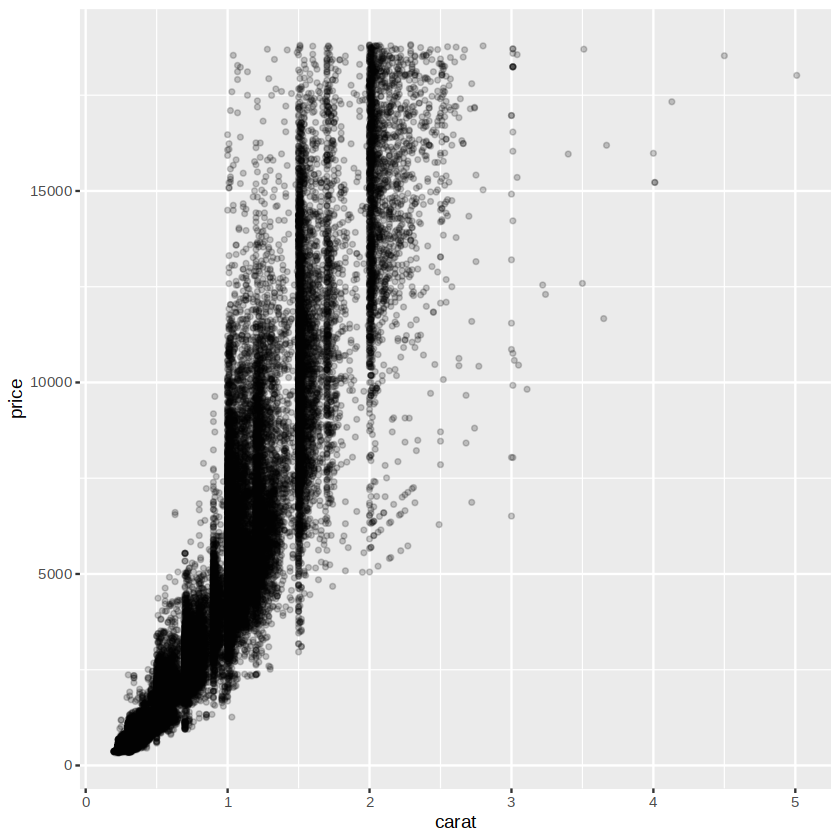

In [2]:
library(ggplot2)
profvis({
  g <- ggplot(diamonds, aes(carat, price)) + geom_point(size = 1, alpha = 0.2)
  print(g)
})